In [154]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
Pokemon_Data = pd.read_csv('Pokemon_Updated.csv')

In [5]:
Pokemon_Data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


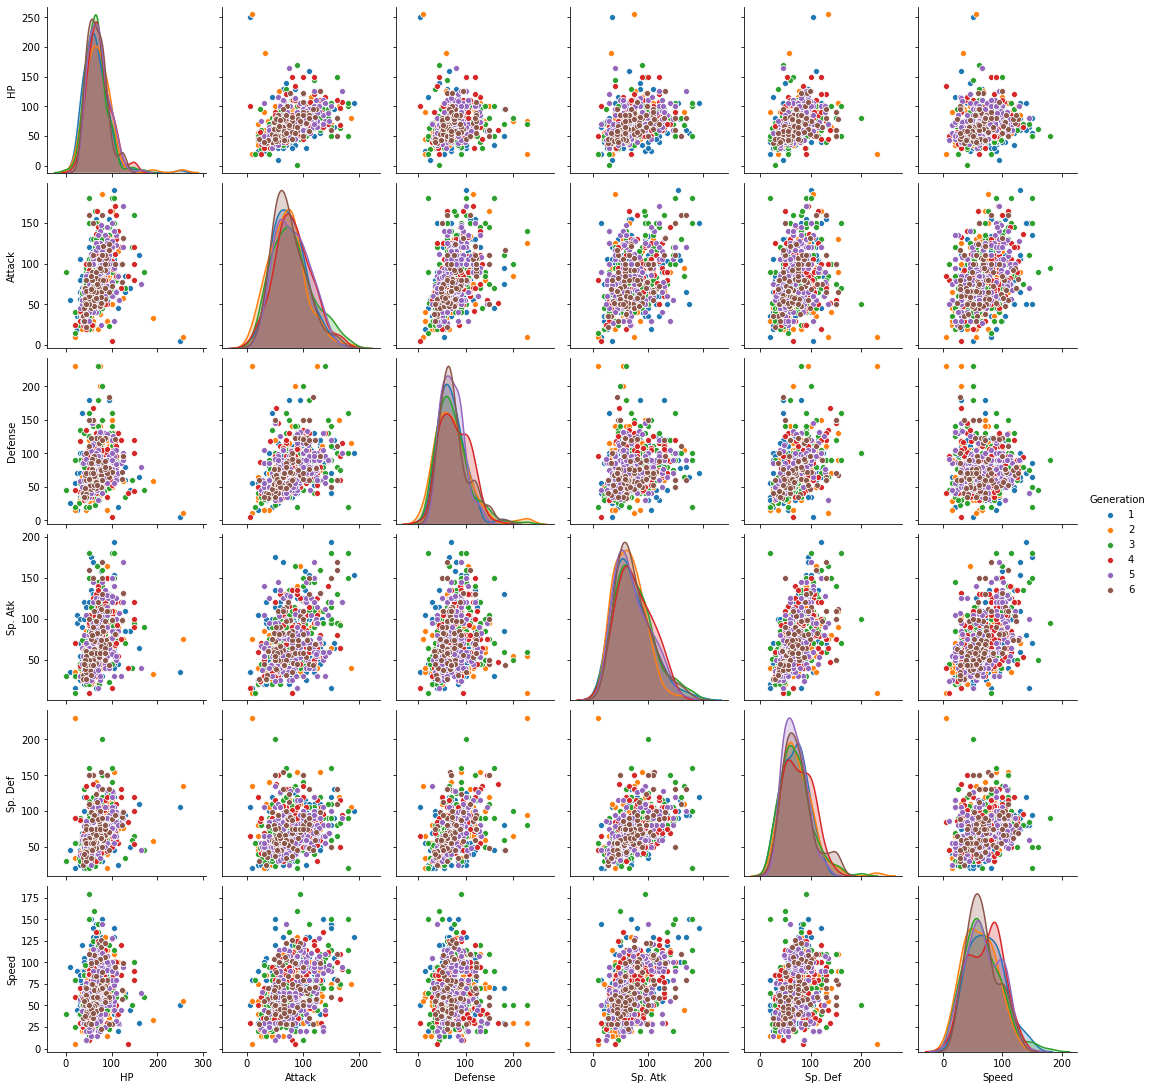

In [167]:
sns.pairplot(Pokemon_Data[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']],hue='Generation')

### Building the mode
For this machine learning model I have chosen the random forest classification as i want to compare it with the Support Vector model I have used previously.
#### Random Forest Classification
The benefit behind choosing this model is that I am predicting a boolean outcome. The fundamental aim of the model is to find the feature that provides the best split when categorising whether the Pokemon is legendary or not.

It is important to compare and contrast different models as we want to increase our accuracy when predicting whether a Pokemon is Legendary or not.

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(Pokemon_Data)
imp_trained_Pokemon = imp_mean.transform(Pokemon_Data)

In [10]:
imp_trained_Pokemon = pd.DataFrame(imp_trained_Pokemon)

In [11]:
imp_trained_Pokemon.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,Flying,39,52,43,60,50,65,1,False,309


In [12]:
imp_trained_Pokemon.columns = Pokemon_Data.columns
#Adding back the columns

In [13]:
imp_trained_Pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,Flying,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


In [14]:
P_RForest = imp_trained_Pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary']]

In [17]:
P_RForest['Target'] = P_RForest['Legendary'].replace({False:0,True:1})

C:\Users\dwell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
P_RForest.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Target
0,45,49,49,65,65,45,1,False,0
1,60,62,63,80,80,60,1,False,0
2,80,82,83,100,100,80,1,False,0
3,80,100,123,122,120,80,1,False,0
4,39,52,43,60,50,65,1,False,0


In [140]:
X = P_RForest.drop(['Defense','Speed','Legendary','Target'],axis=1)

In [141]:
X

,HP,Attack,Sp. Atk,Sp. Def,Generation
0,45,49,65,65,1
1,60,62,80,80,1
2,80,82,100,100,1
3,80,100,122,120,1
4,39,52,60,50,1
...,...,...,...,...,...
795,50,100,100,150,6
796,50,160,160,110,6
797,80,110,150,130,6
798,80,160,170,130,6


In [114]:
y = P_RForest['Target']

### Building the model

I would repeat this process reducing the number of features used and seeing how that impacts the score for te model.
The aim is to find out what features are vital when maintain high accuracy.
This will help when is comes to visualsing the decision tree

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [144]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [151]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 5)

In [152]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [153]:
classifier.score(X_test,y_test)

0.95

### Evaluating the model
Comapreing the accuracy sore on the test data set compared to the training data set.

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[143   1]
 [  7   9]]


0.95

### Visualising the decision tree

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

In [85]:
classifierViz = classifier.fit(X_train,y_train)

Here we are dispalying a list of the decisin tree

In [86]:
classifierViz.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=953453411, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=236996814, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth

[Text(374.01377952755905, 520.95, 'X[0] <= 0.361\nentropy = 0.439\nsamples = 406\nvalue = [582, 58]'),
 Text(210.89763779527559, 475.65000000000003, 'X[5] <= 2.699\nentropy = 0.102\nsamples = 291\nvalue = [447, 6]'),
 Text(131.81102362204723, 430.35, 'X[4] <= 2.589\nentropy = 0.058\nsamples = 288\nvalue = [446, 3]'),
 Text(52.724409448818896, 385.05, 'X[3] <= 1.511\nentropy = 0.023\nsamples = 282\nvalue = [440, 1]'),
 Text(26.362204724409448, 339.75, 'entropy = 0.0\nsamples = 270\nvalue = [422, 0]'),
 Text(79.08661417322834, 339.75, 'X[1] <= 1.353\nentropy = 0.297\nsamples = 12\nvalue = [18, 1]'),
 Text(52.724409448818896, 294.45, 'entropy = 0.0\nsamples = 10\nvalue = [16, 0]'),
 Text(105.44881889763779, 294.45, 'X[5] <= 0.638\nentropy = 0.918\nsamples = 2\nvalue = [2, 1]'),
 Text(79.08661417322834, 249.14999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(131.81102362204723, 249.14999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(210.89763779527559, 385

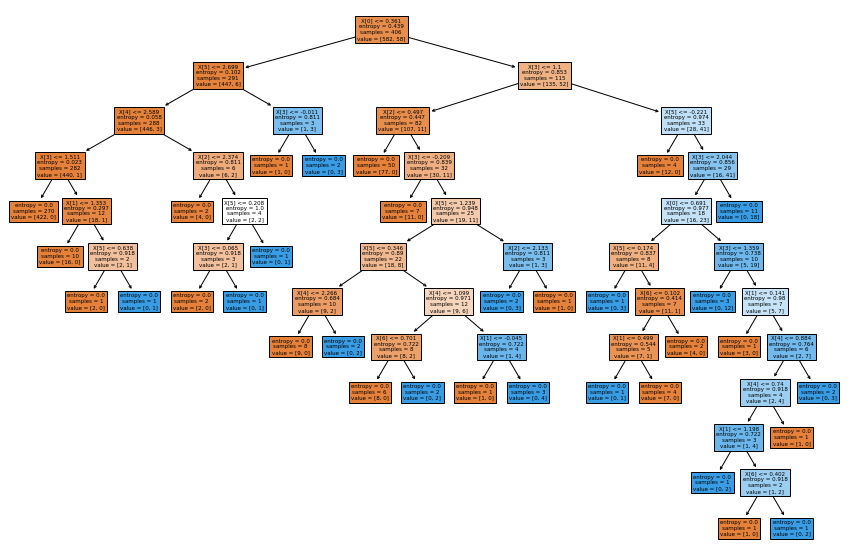

In [87]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifierViz.estimators_[1],filled =True)